# Aula 6.1 - Introdução a classes em python

- Maior abstração;
- Permite focar apenas na função e não como ela é implementada;
- Reaproveitamento em outros códigos;
- Classes indicam as definições para os objetos;
- Classes podem ser vistas como um "molde" dos objetos;
- Um objeto é uma instância da classe.

#### Construindo uma classe em Python

In [1]:
# protótipo de uma classe em python
class MinhaClasse:
    '''Corpo da Classe'''
    pass

In [2]:
help(MinhaClasse)

Help on class MinhaClasse in module __main__:

class MinhaClasse(builtins.object)
 |  Corpo da Classe
 |  
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [4]:
# criando a classe carro
class Carro:
    '''Corpo da classe Carro'''
    numero_portas = 4

    def print_mensagem(self):
        print("Carro criado.")

print(Carro.numero_portas)
print(Carro.print_mensagem)
print(Carro.__doc__) 

4
<function Carro.print_mensagem at 0x7f0665fe5f80>
Corpo da classe Carro


In [5]:
# instanciando o objeto
carro1 = Carro()
carro1.print_mensagem()

Carro criado.


# Aula 6.2 - Construindo classes em python

#### Construtores
Construtores são métodos (funções) de uma classe que começam com `__init__()`.
- São chamadas sempre que os objetos são instanciados
- Normalmente, utilizamos os construtores para iniciar variáveis de uma classe

In [16]:
# construtor de uma classe
class Carro:
    def __init__(self, cor="vermelho", n_portas=3):
        self.cor_do_carro = cor
        self.n_portas_do_carro = n_portas

    def get_cor_do_carro(self):
        return self.cor_do_carro

    def get_numero_portas(self):
        return self.n_portas_do_carro

In [15]:
# instanciando um objeto do tipo carro
carro1 = Carro(cor='azul')
carro2 = Carro()
carro3 = Carro(cor='prata')

#### Mostrando as cores de cada um dos carros

In [11]:
carro1.get_cor_do_carro()

'azul'

In [9]:
carro2.get_cor_do_carro()

'vermelho'

In [10]:
carro3.get_cor_do_carro()

'prata'

#### O parâmetro "self"

- Referencia a instância corrente do objeto;
- Utilizada para acessar os elementos que pertencem à mesma classe;
- A palavra "self" é uma convenção (pode ser substituída por qualquer outra string)

#### Modificando valores de atributos das classes

In [19]:
carro4 = Carro('branco', 5)
carro4.get_cor_do_carro()

'branco'

In [21]:
carro4.get_numero_portas()

5

Podemos acessar os atributos diretamente, embora isso não seja o mais aconselhável. Ex: `carro4.cor_do_carro`.

In [22]:
carro4.cor_do_carro = 'verde'
carro4.get_cor_do_carro()

'verde'

#### Deletando atributos de um objeto

In [23]:
# instanciando um objeto do tipo carro
carro1 = Carro('azul', 4)

In [24]:
# deletando os atributos do objeto
del carro1.cor_do_carro

In [25]:
# obtendo a cor do carro
carro1.get_cor_do_carro()

AttributeError: 'Carro' object has no attribute 'cor_do_carro'

In [27]:
# deletando o objeto instanciado
del carro1

NameError: name 'carro1' is not defined

In [29]:
# tentando acessar o objeto
carro1

NameError: name 'carro1' is not defined

# Aula 6.3 - Herança em python

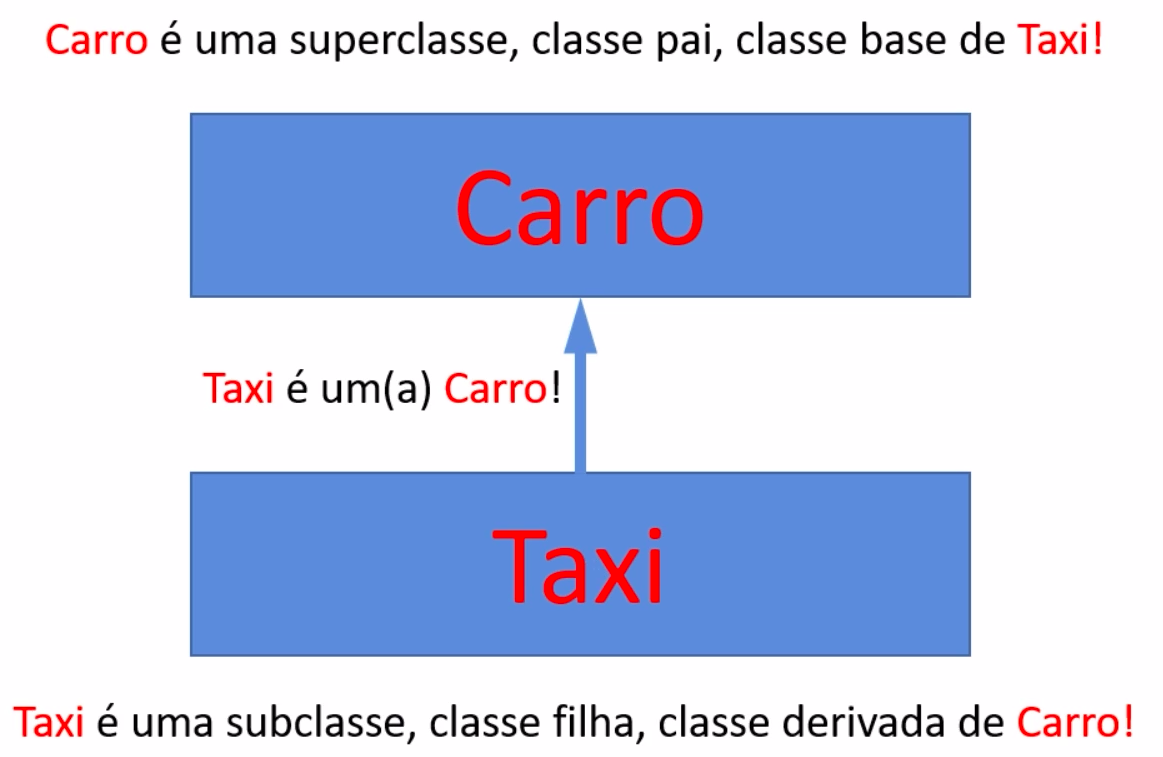

- Permite reutilizar o código;
- A subclasse (ou classe filha) obtém **todos os atributos** da classe pai;
- A classe filha pode adicionar novos atributos ou funções;
- Para a classe filha não é necessário escrever todo o código da classe pai.

In [1]:
# sintaxe de herança em python
class ClassePai:
    '''Corpo da classe pai'''

class ClasseFilha(ClassePai):
    '''Corpo da classe filha'''

In [8]:
# definindo a classe formas geometricas:
class Formas:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    descricao = "A forma ainda não foi definida."
    autor = 'Ainda não foi definido um autor para ela.'

    def area(self):
        return self.x * self.y

    def get_perimetro(self):
        return 2 * self.x + 2 * self.y

    def set_descricao(self, texto):
        self.descricao = texto

    def set_nome_autor(self, texto):
        self.autor = texto

    def set_escala(self, escala):
        self.x = self.x * escala
        self.y = self.y * escala

In [5]:
# instanciando um retangulo
ret = Formas(5, 8)

In [6]:
ret.area()

40

In [7]:
# definindo um quadrado
quad = Formas(3, 3)

In [9]:
# poderia definir uma classe tipo quadrado, pois quadrado é uma forma geometrica
class Quadrado(Formas):
    def __init__(self, x):
        self.x = x
        self.y = x

In [10]:
# definindo um 'quadrado' a partir da classe filha
quadrado = Quadrado(3)

In [11]:
# acessando os demais métodos
quadrado.area()

9

In [13]:
quadrado.descricao

'A forma ainda não foi definida.'

In [14]:
# adicionando novos métodos à classe Quadrado
class Quadrado(Formas):
    def __init__(self, x):
        self.x = x
        self.y = x

    def perimetro_quadrado(self):
        return self.x * 4

In [15]:
# definindo um quadrado a partir da classe filha
quadrado = Quadrado(4)

In [16]:
# utilizando método da classe pai
quadrado.set_nome_autor("ebert")

In [17]:
# utilizando método 'exclusivo' da classe filha
quadrado.perimetro_quadrado()

16

#### É possível sobrescrever métodos da classe pai na classe filha. Ex:

In [18]:
class Quadrado(Formas):
    # novo método construtor com um parâmetro
    def __init__(self, x):
        self.x = x
        self.y = x

    def perimetro_quadrado(self):
        return self.x * 4

#### Acessando os métodos da classe pai

In [24]:
class Retangulo:
    def __init__(self, comprimento, largura):
        self.comprimento = comprimento
        self.largura = largura

    def area(self):
        return self.comprimento * self.largura

    def perimetro(self):
        return 2 * self.comprimento + 2 * self.largura

class Quadrado(Retangulo):
    def __init__(self, lado):
        super().__init__(lado, lado)

In [25]:
# instanciando o objeto 'quadrado'
quadrado = Quadrado(6)

In [26]:
print(quadrado.perimetro())

24


In [27]:
print(quadrado.area())

36


#### Também é possível acessar os métodos

In [41]:
class Cubo(Quadrado):
    def area_da_superficie(self):
        area_da_face = super().area()
        return area_da_face * 6

    def volume(self):
        area_da_face = super().area()
        return area_da_face * self.comprimento

In [43]:
# instanciando o objeto 'cubo'
cubo = Cubo(4)

In [39]:
cubo.area_da_superficie()

96

In [44]:
cubo.volume()

64

#### Verificando heranças

In [45]:
print(issubclass(Cubo, Retangulo))

True


In [46]:
print(issubclass(Cubo, Quadrado))

True


In [47]:
print(issubclass(Cubo, Formas))

False


#### Verificando instâncias

In [48]:
print(isinstance(cubo, Cubo))

True


In [49]:
print(isinstance(cubo, Quadrado))

True


In [50]:
print(isinstance(cubo, Retangulo))

True


In [51]:
print(isinstance(cubo, Formas))

False


# Aula 6.4 - Polimorfismo em python

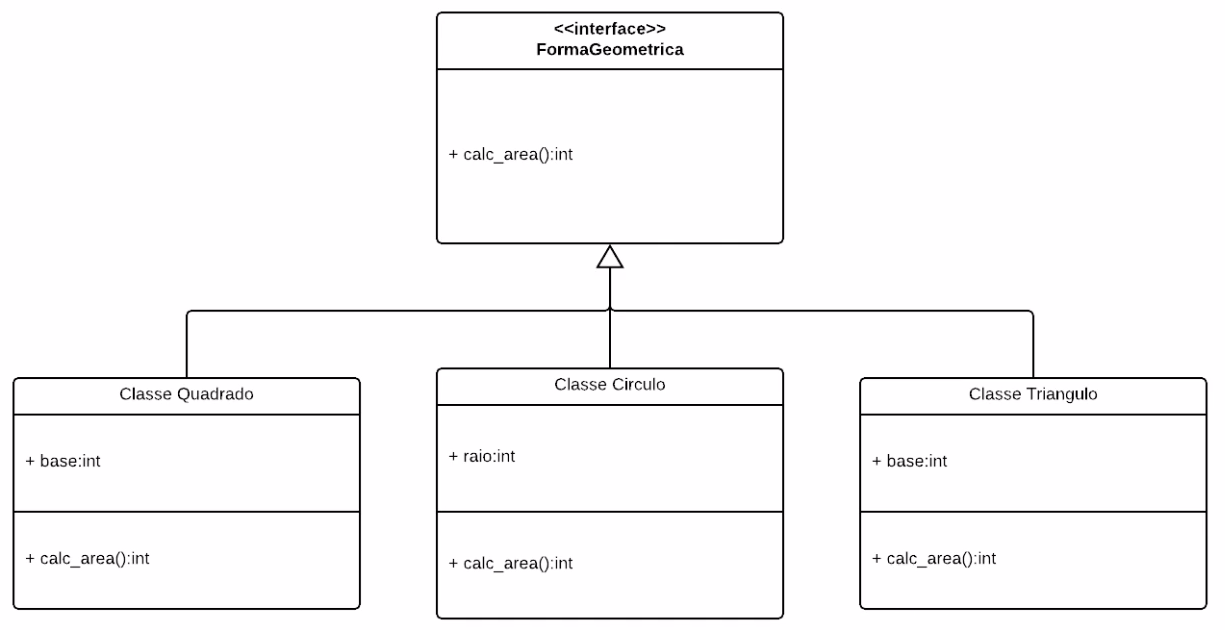

- Mesmo método está sendo utilizado de formas diferentes:
    - área do quadrado é calculada de maneira diferente da área do círculo e etc.

#### Exemplos:

In [52]:
n1 = 10
n2 = 20
print(n1+n2)

30


In [54]:
s1 = 'Ebert'
s2 = ' '
s3 = 'Rodrigues'
print(s1+s2+s3)

Ebert Rodrigues


In [55]:
# polimorfismo para o método len()
print(len('STRING'))
print(len(['L1', 'L2', 'L3']))
print(len({'Nome': 'Ebert', 'Idade': 27}))

6
3
2


#### Voltando à classe Retângulo

In [57]:
# definindo a classe retangulo e a filha quadrado
class Retangulo:
    def __init__(self, comprimento, largura):
        self.comprimento = comprimento
        self.largura = largura
    
    def area(self):
        return self.comprimento * self.largura

    def perimetro(self):
        return 2 * self.comprimento + 2 * self.largura

In [67]:
# redefinindo os métodos para a classe quadrado
class Quadrado(Retangulo):
    def __init__(self, lado):
        super().__init__(lado, lado)

    def area(self):
        return self.comprimento * self.comprimento

    def perimetro(self):
        return self.comprimento * 4

In [68]:
# instanciando um retangulo e um quadrado
ret = Retangulo(4, 5)
qua = Quadrado(5)

In [69]:
print(ret)
print(qua)

In [70]:
ret.area()

20

In [71]:
qua.perimetro()

20